In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, ElasticNetCV, RidgeCV, Lasso
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from scipy import stats
from scipy.stats import skew, norm
from sklearn.metrics import mean_squared_error
from scipy.special import boxcox1p

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
missing_values = (train.isnull().sum().sort_values(ascending=False)[train.isnull().sum().sort_values(ascending=False)!=0])

In [8]:
percent = (100*(missing_values/len(train)))

In [9]:
missing_train = pd.concat([missing_values, percent], axis=1, keys=['Total', 'Percent'])

In [10]:
missing_train

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [11]:
missing_values1 = test.isnull().sum().sort_values(ascending=False)[test.isnull().sum().sort_values(ascending=False)!=0]
percent1 = (100*(missing_values1/len(train)))
missing_test = pd.concat([missing_values1, percent1], axis=1, keys=['Total', 'Percent'])
missing_test

,Total,Percent
PoolQC,1456,99.726027
MiscFeature,1408,96.438356
Alley,1352,92.602740
Fence,1169,80.068493
FireplaceQu,730,50.000000
LotFrontage,227,15.547945
GarageCond,78,5.342466
GarageQual,78,5.342466
GarageYrBlt,78,5.342466
GarageFinish,78,5.342466


In [12]:
nrows_train = train.shape[0]
nrows_test = test.shape[0]

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [14]:
train_y = train.SalePrice

In [15]:
train.drop(['SalePrice'], axis = 1,inplace=True)

In [16]:
train_Id = train.Id
test_Id = test.Id

In [17]:
all_data = pd.concat((train, test)).reset_index(drop=True)

In [18]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [19]:
all_data.drop(['Id'], axis=1, inplace=True)

In [20]:
total = all_data.isnull().sum().sort_values(ascending=False)[all_data.isnull().sum().sort_values(ascending=False)!=0]

In [21]:
percent = round(100*(total/len(all_data)),2)

In [22]:
all_missing = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
all_missing

Text(0.5, 1.0, 'Missing Values')

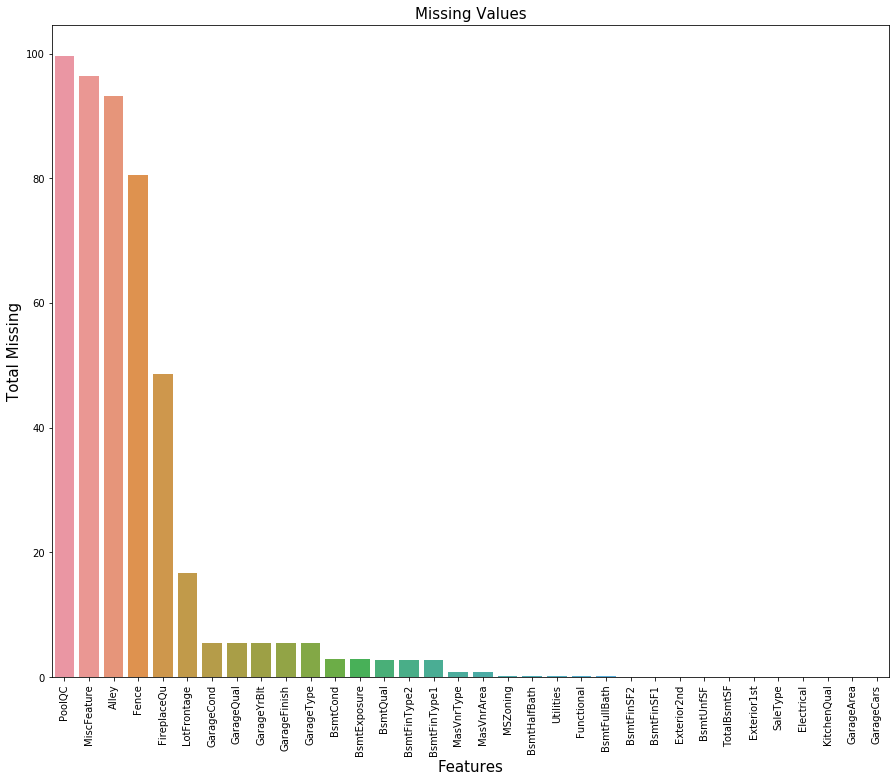

In [23]:
f, ax =plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_missing.index, y = all_missing.Percent)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Total Missing', fontsize = 15)
plt.title("Missing Values", fontsize = 15)

In [24]:
missing_val_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                   'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType','BsmtCond',
                   'BsmtExposure', 'BsmtQual', 'BsmtFinType2','BsmtFinType1', 'MasVnrType']

In [25]:
for cols in missing_val_cols:
    all_data[cols] = all_data[cols].fillna('None')

In [26]:
zero_val_cols = ['GarageYrBlt', 'MasVnrArea', 'MasVnrArea','GarageArea',
                 'GarageCars','TotalBsmtSF', 'BsmtUnfSF'
                ,'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath','BsmtHalfBath']
for cols in zero_val_cols:
    all_data[cols] = all_data[cols].fillna(0)

In [27]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [28]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

In [29]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [30]:
total1 = all_data.isnull().sum().sort_values(ascending=False)[all_data.isnull().sum().sort_values(ascending=False)!=0]

In [31]:
percent1 = round(100*(total1/len(all_data)),2)
all_missing = pd.concat([total1, percent1], axis=1, keys = ['Total', 'Percent'])
all_missing

,Total,Percent


In [32]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 n

In [34]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [94]:
train_data =pd.read_csv('./train.csv')
def pp(w,x,y,z):
    sns.pairplot(data=train_data, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

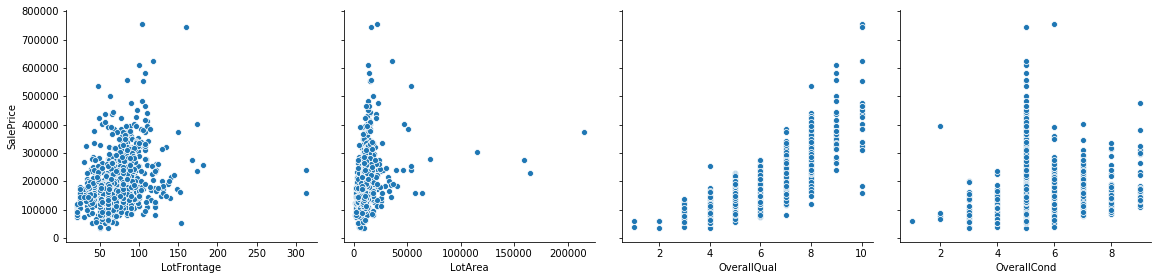

In [36]:
pp('LotFrontage', 'LotArea', 'OverallQual', 'OverallCond')

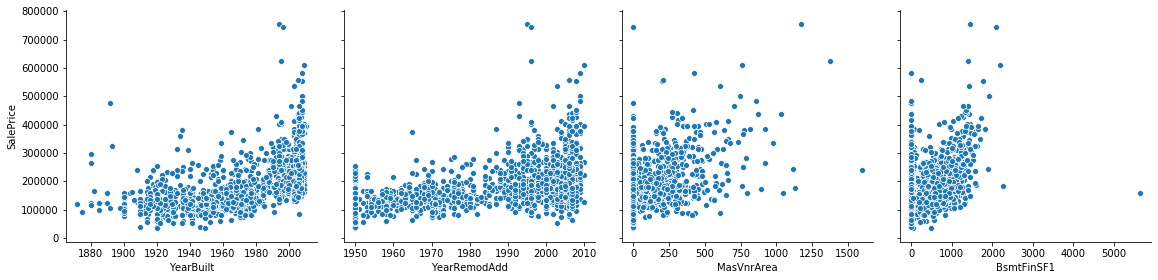

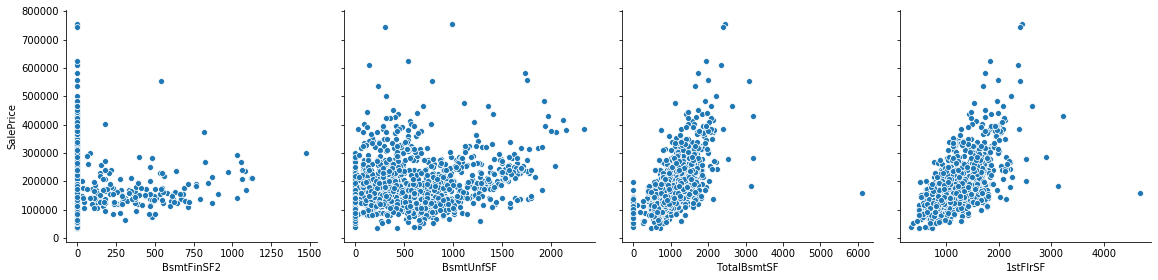

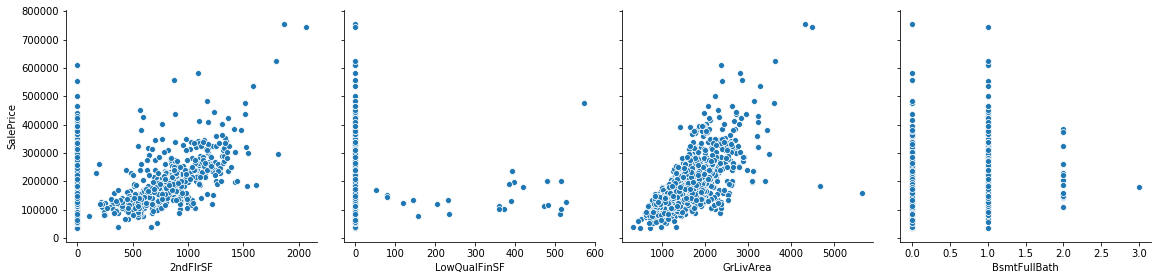

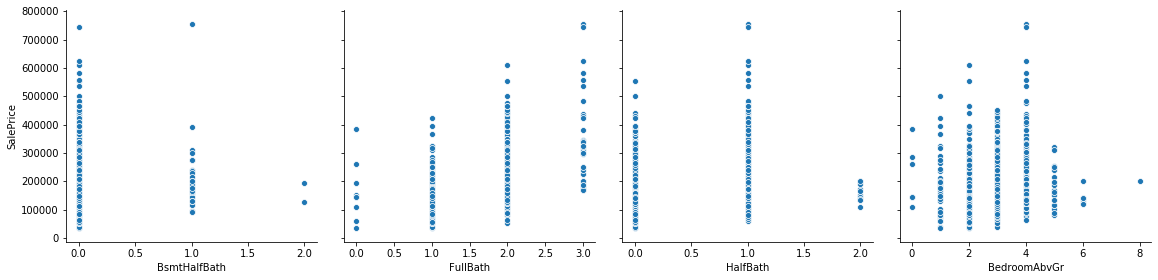

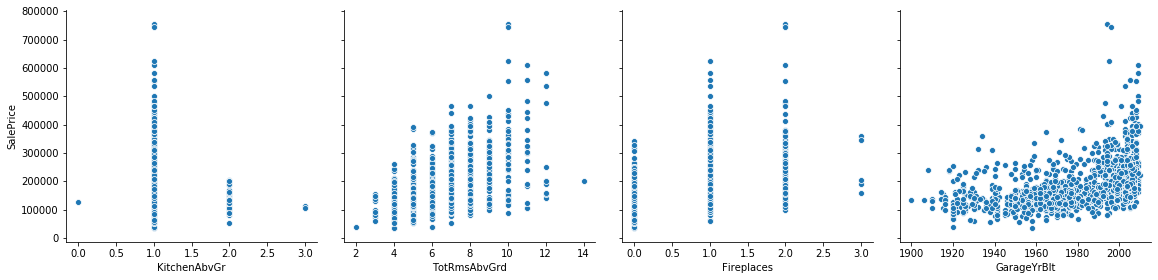

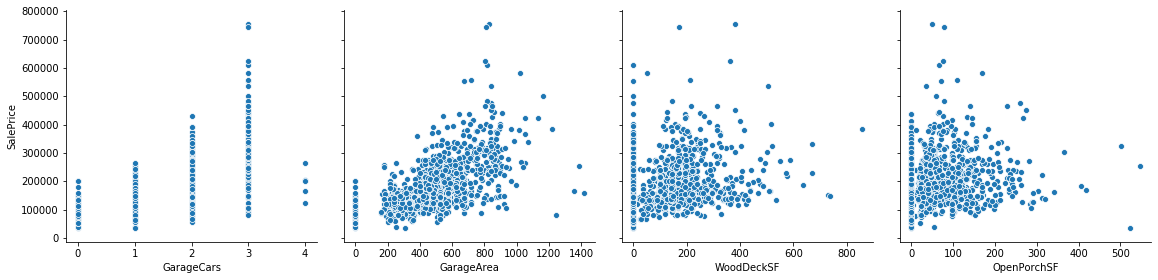

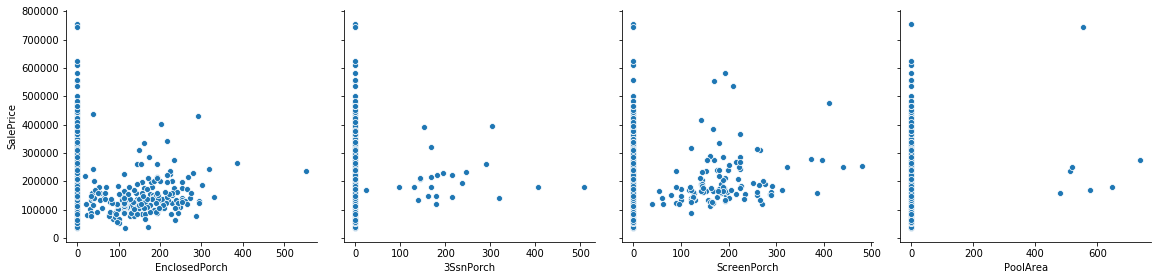

In [37]:
pp('YearBuilt','YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1')
pp('BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF')
pp('2ndFlrSF', 'LowQualFinSF', 'GrLivArea','BsmtFullBath')
pp('BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr')
pp('KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt')
pp('GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF')
pp('EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea')

In [38]:
all_data['OverallQual']  = all_data['OverallQual'].astype(str)
all_data['OverallCond']  = all_data['OverallCond'].astype(str)
all_data['YearBuilt']  = all_data['YearBuilt'].astype(str)
all_data['YearRemodAdd']  = all_data['YearRemodAdd'].astype(str)
all_data['GarageYrBlt']  = all_data['GarageYrBlt'].astype(str)
all_data['GarageCars']  = all_data['GarageCars'].astype(str)
all_data['Fireplaces']  = all_data['Fireplaces'].astype(str)
all_data['KitchenAbvGr'] = all_data['KitchenAbvGr'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [39]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [40]:
all_data['TotalBath']=all_data['BsmtFullBath'] + all_data['FullBath'] + 0.5*(all_data['BsmtHalfBath']+all_data['HalfBath'])

In [41]:
all_data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF','BsmtFullBath', 'FullBath'
              ,'BsmtHalfBath', 'HalfBath'], axis=1, inplace=True)


In [42]:
from sklearn.preprocessing import LabelEncoder
all_data = all_data.drop(['Utilities'], axis=1)

In [120]:
cols = ('MSSubClass', 'Street', 'Alley', 'LotShape', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
       'KitchenQual', 'CentralAir', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 
        'PavedDrive', 'PoolQC', 'Fence', 'YrSold', 'MoSold', 'Fireplaces')
for col in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col] = lbl.transform(list(all_data[col].values))

KeyError: 'Fireplaces'

In [44]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'HeatingQC', 'CentralAir', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'FireplaceQu',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'TotalSF', 'TotalBath'],
      dtype='object')

In [45]:
all_data.shape

(2919, 73)

In [46]:
all_data.drop(all_data[all_data['GrLivArea'] > 4000].index, inplace =True)

Text(0.5, 0, 'SalesPrice')

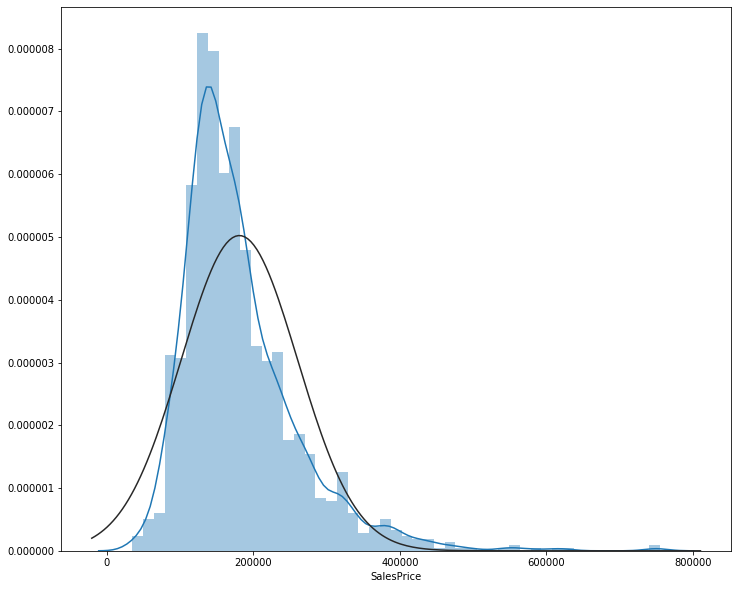

In [47]:
plt.subplots(figsize=(12,10))
sns.distplot(train_y, fit = norm)
plt.xlabel('SalesPrice')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

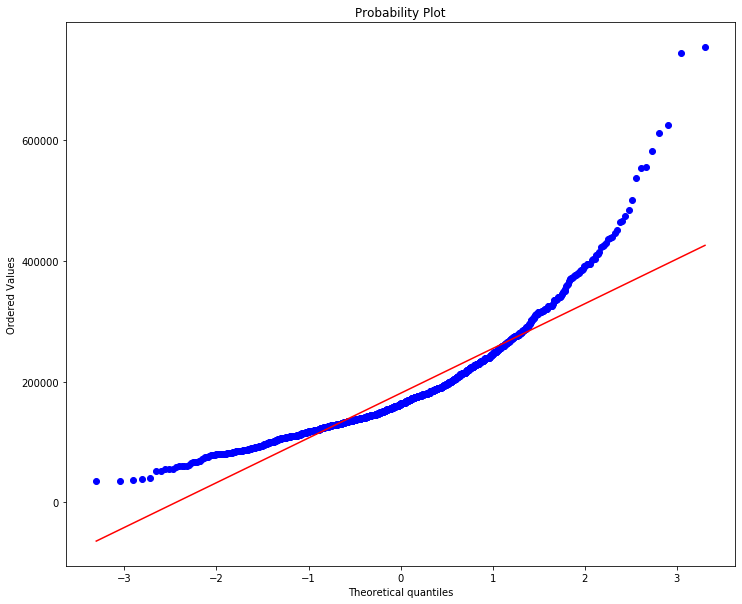

In [48]:
fig = plt.subplots(figsize = (12,10))
stats.probplot(train_y, plot=plt)

In [49]:
train_y = np.log1p(train_y)

Text(0.5, 0, 'SalesPrice')

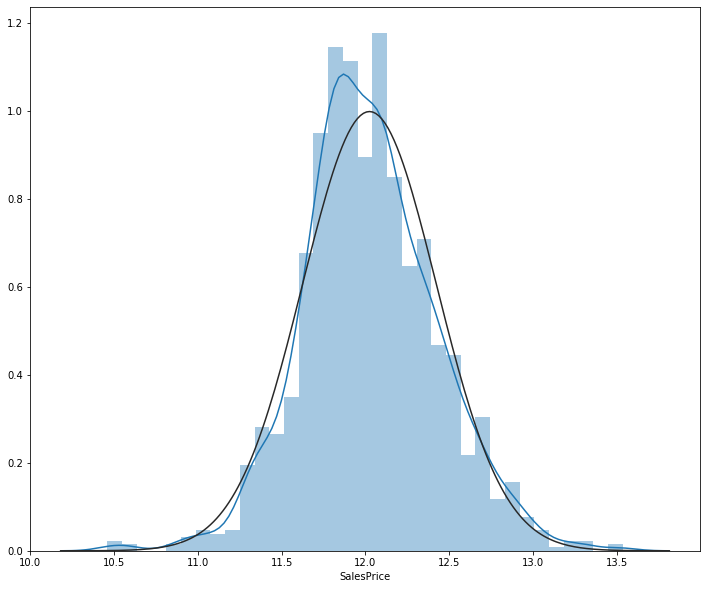

In [50]:
plt.subplots(figsize=(12,10))
sns.distplot(train_y, fit = norm)
plt.xlabel('SalesPrice')

In [51]:
skew(train_y)

0.12122191311528363

In [54]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 0 to 2918
Data columns (total 73 columns):
MSSubClass       2914 non-null int64
MSZoning         2914 non-null object
LotFrontage      2914 non-null float64
LotArea          2914 non-null int64
Street           2914 non-null int64
Alley            2914 non-null int64
LotShape         2914 non-null int64
LandContour      2914 non-null object
LotConfig        2914 non-null object
LandSlope        2914 non-null int64
Neighborhood     2914 non-null object
Condition1       2914 non-null object
Condition2       2914 non-null object
BldgType         2914 non-null object
HouseStyle       2914 non-null int64
OverallQual      2914 non-null int64
OverallCond      2914 non-null int64
YearBuilt        2914 non-null int64
YearRemodAdd     2914 non-null int64
RoofStyle        2914 non-null object
RoofMatl         2914 non-null object
Exterior1st      2914 non-null object
Exterior2nd      2914 non-null object
MasVnrType       2914 non-nul

In [54]:
skew(all_data[numeric_feats])

array([  0.14049618,   1.09161527,  13.20217727, -15.48668681,
        -0.65120245,  -0.6216225 ,   4.97039742,   0.31980853,
        -0.28259285,   0.56864327,  -0.50050582,  -0.44871226,
         2.5721054 ,  -1.79936499,  -2.49464403,  -0.48846262,
        -2.85929957,  -1.12119979,   0.82965982,   4.1420423 ,
         0.9212975 ,   0.48384976,  -3.45535219,  12.07820272,
         0.87422204,   0.32757254,  -1.4524325 ,   0.7095974 ,
        -4.05167831,   0.33761487,  -0.61284106,   0.21105834,
        -3.0707409 ,  -3.592039  ,  -2.97572524,   1.8480835 ,
         2.49512412,   4.00002232,  11.36610019,   3.94271132,
        18.69859319, -22.9802324 ,  -1.99362793,  22.17187149,
        -0.64654149,   0.1303658 ,   0.64580063,   0.48285473])

In [55]:
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x))

In [56]:
skewed_feats = skewed_feats[abs(skewed_feats)>0.75]

In [58]:
skewed_feats

LotFrontage       1.091615
LotArea          13.202177
Street          -15.486687
LandSlope         4.970397
MasVnrArea        2.572105
ExterQual        -1.799365
ExterCond        -2.494644
BsmtCond         -2.859300
BsmtExposure     -1.121200
BsmtFinSF1        0.829660
BsmtFinSF2        4.142042
BsmtUnfSF         0.921298
CentralAir       -3.455352
LowQualFinSF     12.078203
GrLivArea         0.874222
KitchenQual      -1.452432
Functional       -4.051678
GarageQual       -3.070741
GarageCond       -3.592039
PavedDrive       -2.975725
WoodDeckSF        1.848084
OpenPorchSF       2.495124
EnclosedPorch     4.000022
3SsnPorch        11.366100
ScreenPorch       3.942711
PoolArea         18.698593
PoolQC          -22.980232
Fence            -1.993628
MiscVal          22.171871
dtype: float64

In [59]:
lam = 0.15
for feats in skewed_feats.index:
    all_data[feats] = boxcox1p(all_data[feats], lam)

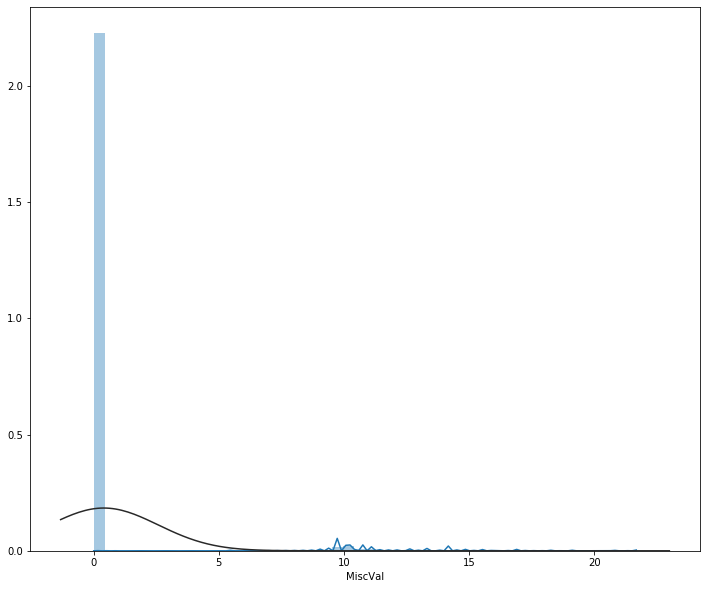

In [60]:
fig, ax = plt.subplots(figsize = (12,10))
sns.distplot(all_data['MiscVal'], fit=norm)

In [61]:
skew(all_data['MiscVal'])

5.550104226021907

In [62]:
all_data.shape

(2914, 73)

In [63]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2914, 334)

In [64]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,5.831328,19.212182,0.730463,1,3,0.0,5,7,4,...,0,0,0,1,0,0,0,0,1,0
1,5,6.221214,19.712205,0.730463,1,3,0.0,2,6,7,...,0,0,0,1,0,0,0,0,1,0
2,10,5.914940,20.347241,0.730463,1,0,0.0,5,7,4,...,0,0,0,1,0,0,0,0,1,0
3,11,5.684507,19.691553,0.730463,1,0,0.0,5,7,4,...,0,0,0,1,1,0,0,0,0,0
4,10,6.314735,21.325160,0.730463,1,0,0.0,5,8,4,...,0,0,0,1,0,0,0,0,1,0


In [95]:
corrmat = train_data.drop(['Id'], axis=1).select_dtypes(include="number").corr()

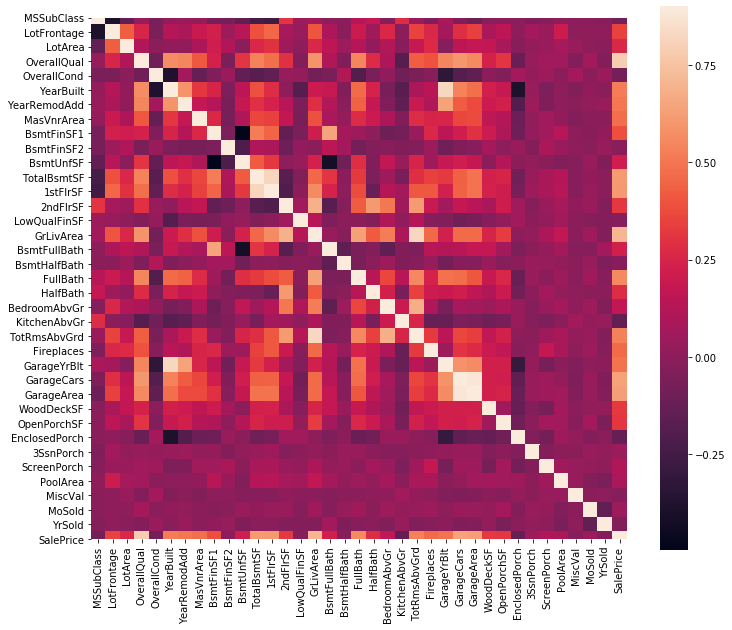

In [96]:
plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, vmax=0.9, square=True)

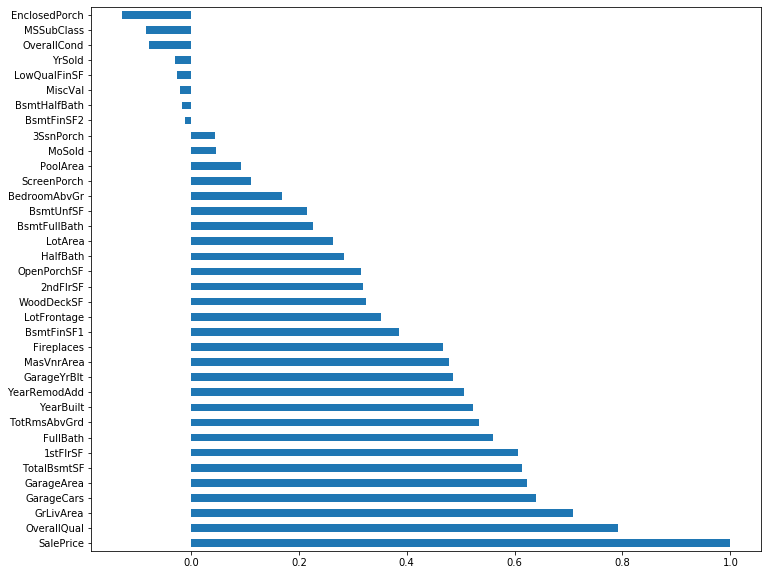

In [97]:
plt.subplots(figsize=(12,10))
corrmat['SalePrice'].sort_values(ascending=False)[:-1].plot(kind="barh")

In [98]:
cols  = corrmat.nlargest(15, 'SalePrice')['SalePrice'].index

In [99]:
corrmat = train_data[cols].corr()

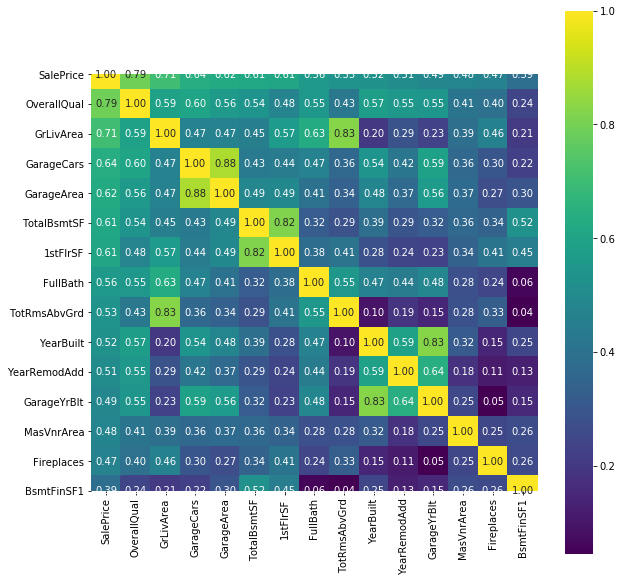

In [100]:
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)

In [127]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)